<a href="https://colab.research.google.com/github/Cerli-CBM/Malicious-url-detection/blob/main/Malicious_urlbda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MALICIOUS URL DETECTION**

The goal of this project is to develop a malicious URL detection system that identifies
potentially harmful URLs to users.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=2a68d0aa42bf056398434b8fd76621f2b6a5a3b7589d14397820ef0a97055cfd
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
pip install findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
#importing datasets
md =spark.read.csv("/content/drive/MyDrive/malicious_url.csv",header=True,inferSchema=True)

In [ ]:
md.show(10,False)

+---------------------------------+-----+-----------------------+-------------+--------------+--------------+-------------+----------+-------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------+--------------+--------------+----------------+-------------+----------------+--------------+-------------------+--------------------+--------------+---------------+-------------+----------------+---------------+-----------------------------------+-------------------------+-----------------------+--------+--------------------+----------------------+---------------+-------------------+----------------------------+----------------+----------------+-------------------+----------------------+-----------------+---------+----------------------+-----------+--------------------+--------------------+--------------------------+-------------------+-------+------+--

**ACTIONS**

In [ ]:
#count the number of rows
md.count()

1682213

In [ ]:
#take -retrieve the first n elements
md.take(3)

[Row(url='spa-security.de', label=0, source='dmoz_harvard', url_has_login=0, url_has_client=0, url_has_server=0, url_has_admin=0, url_has_ip=0, url_isshorted=0, url_len=15, url_entropy=3.640223928941852, url_hamming_1=0.5083333333333333, url_hamming_00=0.1416666666666666, url_hamming_10=0.2, url_hamming_01=0.2833333333333333, url_hamming_11=0.1583333333333333, url_2bentropy=1.8003115692558134, url_3bentropy=2.3993425283550898, url_count_dot=1, url_count_https=0, url_count_http=0, url_count_perc=0, url_count_hyphen=1, url_count_www=0, url_count_atrate=0, url_count_hash=0, url_count_semicolon=0, url_count_underscore=0, url_count_ques=0, url_count_equal=0, url_count_amp=0, url_count_letter=13, url_count_digit=0, url_count_sensitive_financial_words=0, url_count_sensitive_words=0, url_nunique_chars_ratio=0.8666666666666667, path_len=0, path_count_no_of_dir=0, path_count_no_of_embed=0, path_count_zero=0, path_count_pertwent=0, path_has_any_sensitive_words=0, path_count_lower=13, path_count_u

In [ ]:
#first- retrieve the first row in the dataset
md.first()

Row(url='spa-security.de', label=0, source='dmoz_harvard', url_has_login=0, url_has_client=0, url_has_server=0, url_has_admin=0, url_has_ip=0, url_isshorted=0, url_len=15, url_entropy=3.640223928941852, url_hamming_1=0.5083333333333333, url_hamming_00=0.1416666666666666, url_hamming_10=0.2, url_hamming_01=0.2833333333333333, url_hamming_11=0.1583333333333333, url_2bentropy=1.8003115692558134, url_3bentropy=2.3993425283550898, url_count_dot=1, url_count_https=0, url_count_http=0, url_count_perc=0, url_count_hyphen=1, url_count_www=0, url_count_atrate=0, url_count_hash=0, url_count_semicolon=0, url_count_underscore=0, url_count_ques=0, url_count_equal=0, url_count_amp=0, url_count_letter=13, url_count_digit=0, url_count_sensitive_financial_words=0, url_count_sensitive_words=0, url_nunique_chars_ratio=0.8666666666666667, path_len=0, path_count_no_of_dir=0, path_count_no_of_embed=0, path_count_zero=0, path_count_pertwent=0, path_has_any_sensitive_words=0, path_count_lower=13, path_count_up

In [ ]:
#limit - limit the number of rows
md.limit(10)

url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,url_hamming_10,url_hamming_01,url_hamming_11,url_2bentropy,url_3bentropy,url_count_dot,url_count_https,url_count_http,url_count_perc,url_count_hyphen,url_count_www,url_count_atrate,url_count_hash,url_count_semicolon,url_count_underscore,url_count_ques,url_count_equal,url_count_amp,url_count_letter,url_count_digit,url_count_sensitive_financial_words,url_count_sensitive_words,url_nunique_chars_ratio,path_len,path_count_no_of_dir,path_count_no_of_embed,path_count_zero,path_count_pertwent,path_has_any_sensitive_words,path_count_lower,path_count_upper,path_count_nonascii,path_has_singlechardir,path_has_upperdir,query_len,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
spa-security.de,0,dmoz_harvard,0,0,0,0,0,0,15,3.640223928941852,0.5083333333333333,0.1416666666666666,0.2,0.2833333333333333,0.1583333333333333,1.8003115692558134,2.3993425283550898,1,0,0,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0.8666666666666667,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,2,de,0,7,0,0
mallander.de,0,majestic_million,0,0,0,0,0,0,12,2.9182958340544887,0.4791666666666667,0.1458333333333333,0.2291666666666666,0.28125,0.1666666666666666,1.837704275830528,2.3398850493643777,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0.6666666666666666,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,2,de,0,3,0,0
zzndb.com.cn,0,alexatop1m,0,0,0,0,0,0,12,2.9182958340544887,0.5520833333333334,0.0729166666666666,0.21875,0.2604166666666667,0.21875,1.740229209352982,2.3451616264274184,2,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0.6666666666666666,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,6,com.cn,0,3,0,0
enviroseal.com/,0,data_clean_train_...,0,0,0,0,0,0,15,3.640223928941851,0.5666666666666667,0.0916666666666666,0.2,0.2833333333333333,0.2166666666666666,1.773971579052594,2.3152780515091504,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0.8666666666666667,0,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
hunt1ngtonbank.3u...,1,ALL-phishing-domains,0,0,0,0,0,0,29,3.9353986674667634,0.5431034482758621,0.0948275862068965,0.2155172413793103,0.2844827586206897,0.1896551724137931,1.77028979705501,2.3611785267172025,2,0,0,0,0,0,0,0,0,0,0,0,0,25,2,1,0,0.6206896551724138,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,3,com,0,6,14,0
augenblickstudios...,0,domcop,0,0,0,0,0,0,21,3.916126946588284,0.5535714285714286,0.0952380952380952,0.2023809523809524,0.2916666666666667,0.2023809523809524,1.7744640575173023,2.3391365535245803,1,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0.7619047619047619,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,3,com,0,11,0,0
semidiceviprima.i...,0,dmoz_harvard,0,0,0,0,0,0,33,3.67587110545754,0.5075757575757576,0.1212121212121212,0.2121212121212121,0.2916666666666667,0.178030303030303,1.8052705985091289,2.3844714280348995,2,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.4848484848484849,0,0,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,2,it,0,9,15,0
nrgeology.blogspo...,0,domcop,0,0,0,0,0,1,25,3.7190795706241735,0.575,0.095,0.185,0.26,0.225,1.7624667253683075,2.291521260466533,3,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0.64,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,6,com.au,0,0,9,0
eng.uwo.ca/resear...,0,data_clean_train_...,0,0,0,0,0,0,33,4.104407755459852,0.5416666666666666,0.1098484848484848,0.2007575757575757,0.2803030303030303,0.1893939393939394,1.7840590798939917,2.370182935166288,2,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0.5757575757575758,8,3,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,2,ca,0,2,3,0
geocities.com/cri...,0,data_clean_train_...,0,0,0,0,0,0,21,3.3680424225727155,0.5833333333333334,0.0892857142857142,0.1845238095238095,0.2857142857142857,0.2261904761904762,1.7625179149119268,2.342399925463964,1,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0.5714285714285714,6,2,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,3,com,0,5,0,0


In [ ]:
#retrieves the columns in the dataset
md.columns

['url',
 'label',
 'source',
 'url_has_login',
 'url_has_client',
 'url_has_server',
 'url_has_admin',
 'url_has_ip',
 'url_isshorted',
 'url_len',
 'url_entropy',
 'url_hamming_1',
 'url_hamming_00',
 'url_hamming_10',
 'url_hamming_01',
 'url_hamming_11',
 'url_2bentropy',
 'url_3bentropy',
 'url_count_dot',
 'url_count_https',
 'url_count_http',
 'url_count_perc',
 'url_count_hyphen',
 'url_count_www',
 'url_count_atrate',
 'url_count_hash',
 'url_count_semicolon',
 'url_count_underscore',
 'url_count_ques',
 'url_count_equal',
 'url_count_amp',
 'url_count_letter',
 'url_count_digit',
 'url_count_sensitive_financial_words',
 'url_count_sensitive_words',
 'url_nunique_chars_ratio',
 'path_len',
 'path_count_no_of_dir',
 'path_count_no_of_embed',
 'path_count_zero',
 'path_count_pertwent',
 'path_has_any_sensitive_words',
 'path_count_lower',
 'path_count_upper',
 'path_count_nonascii',
 'path_has_singlechardir',
 'path_has_upperdir',
 'query_len',
 'query_count_components',
 'pdomai

In [ ]:
#returns the datatypes of every features in the dataset
md.dtypes

[('url', 'string'),
 ('label', 'int'),
 ('source', 'string'),
 ('url_has_login', 'int'),
 ('url_has_client', 'int'),
 ('url_has_server', 'int'),
 ('url_has_admin', 'int'),
 ('url_has_ip', 'int'),
 ('url_isshorted', 'int'),
 ('url_len', 'int'),
 ('url_entropy', 'double'),
 ('url_hamming_1', 'double'),
 ('url_hamming_00', 'double'),
 ('url_hamming_10', 'double'),
 ('url_hamming_01', 'double'),
 ('url_hamming_11', 'double'),
 ('url_2bentropy', 'double'),
 ('url_3bentropy', 'double'),
 ('url_count_dot', 'int'),
 ('url_count_https', 'int'),
 ('url_count_http', 'int'),
 ('url_count_perc', 'int'),
 ('url_count_hyphen', 'int'),
 ('url_count_www', 'int'),
 ('url_count_atrate', 'int'),
 ('url_count_hash', 'int'),
 ('url_count_semicolon', 'int'),
 ('url_count_underscore', 'int'),
 ('url_count_ques', 'int'),
 ('url_count_equal', 'int'),
 ('url_count_amp', 'int'),
 ('url_count_letter', 'int'),
 ('url_count_digit', 'int'),
 ('url_count_sensitive_financial_words', 'int'),
 ('url_count_sensitive_words

In [ ]:
md.printSchema()

root
 |-- url: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- url_has_login: integer (nullable = true)
 |-- url_has_client: integer (nullable = true)
 |-- url_has_server: integer (nullable = true)
 |-- url_has_admin: integer (nullable = true)
 |-- url_has_ip: integer (nullable = true)
 |-- url_isshorted: integer (nullable = true)
 |-- url_len: integer (nullable = true)
 |-- url_entropy: double (nullable = true)
 |-- url_hamming_1: double (nullable = true)
 |-- url_hamming_00: double (nullable = true)
 |-- url_hamming_10: double (nullable = true)
 |-- url_hamming_01: double (nullable = true)
 |-- url_hamming_11: double (nullable = true)
 |-- url_2bentropy: double (nullable = true)
 |-- url_3bentropy: double (nullable = true)
 |-- url_count_dot: integer (nullable = true)
 |-- url_count_https: integer (nullable = true)
 |-- url_count_http: integer (nullable = true)
 |-- url_count_perc: integer (nullable = true)
 |-- url_count_hyph

In [ ]:
#calculate the number of unique values in the "source"
from pyspark.sql import functions as func
source_unique_count = md.select(func.size(func.collect_set("source"))).collect()[0][0]
print(f'Number of unique sources: {source_unique_count}')

Number of unique sources: 13


In [ ]:
#corr- calculates the correlation coefficient between url_len and url_entropy
correlation =md.stat.corr("url_len", "url_entropy")
print(f'Correlation between url_len and url_entropy: {correlation}')

Correlation between url_len and url_entropy: 0.4880093630965763


In [ ]:
#mean - calculates the mean value of the url-len
mean_url_len = md.select(func.mean("url_len")).collect()[0][0]
print(f'Mean url length: {mean_url_len}')

Mean url length: 23.78756614055414


In [ ]:
#min - calculates the minimum value of the url_hamming
min_url_hamming_1 =md.select(func.min("url_hamming_1")).collect()[0][0]
print(f'Minimum url hamming_1: {min_url_hamming_1}')

Minimum url hamming_1: 0.3157894736842105


In [ ]:
#max - calculates the maximum value of the url_entropy
max_url_entropy = md.select(func.max("url_entropy")).collect()[0][0]
print(f'Maximum url entropy: {max_url_entropy}')


Maximum url entropy: 5.354315429593166


In [ ]:
#describe - returns the statistical summary of url_len and url_entropy
stats = md.describe(['url_len', 'url_entropy'])
stats

summary,url_len,url_entropy
count,1682213,1682213
mean,23.78756614055414,3.5270062993174243
stddev,34.23825991155175,0.46003807487031595
min,2,-0.0
max,8250,5.354315429593166


**TRANSFORMATIONS**

In [ ]:
#calculates the average 'url_len' for each distinct value in the 'source'
grouped_data = md.groupBy('source').agg({'url_len': 'mean'})
grouped_data

source,avg(url_len)
data_clean_test_m...,25.793289799594685
openphish,58.6
dmoz_harvard,16.547755120749898
phishtank,26.46653075854653
manual,121.02671755725191
domcop,16.837430317894302
ALL-phishing-links,80.20846829047095
alexatop1m,14.320089947513923
aa419,18.71719641401793
majestic_million,15.149602155141654


In [ ]:
#creates a new DataFrame 'md1' by adding a constant value of 10 to the values in the 'url_len' column of the original DataFrame 'md'.
from pyspark.sql.functions import col, lit
md1 = md.withColumn('new_column', col('url_len') + lit(10))
md1

url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,url_hamming_10,url_hamming_01,url_hamming_11,url_2bentropy,url_3bentropy,url_count_dot,url_count_https,url_count_http,url_count_perc,url_count_hyphen,url_count_www,url_count_atrate,url_count_hash,url_count_semicolon,url_count_underscore,url_count_ques,url_count_equal,url_count_amp,url_count_letter,url_count_digit,url_count_sensitive_financial_words,url_count_sensitive_words,url_nunique_chars_ratio,path_len,path_count_no_of_dir,path_count_no_of_embed,path_count_zero,path_count_pertwent,path_has_any_sensitive_words,path_count_lower,path_count_upper,path_count_nonascii,path_has_singlechardir,path_has_upperdir,query_len,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot,new_column
spa-security.de,0,dmoz_harvard,0,0,0,0,0,0,15,3.640223928941852,0.5083333333333333,0.1416666666666666,0.2,0.2833333333333333,0.1583333333333333,1.8003115692558134,2.3993425283550898,1,0,0,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0.8666666666666667,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,2,de,0,7,0,0,25
mallander.de,0,majestic_million,0,0,0,0,0,0,12,2.9182958340544887,0.4791666666666667,0.1458333333333333,0.2291666666666666,0.28125,0.1666666666666666,1.837704275830528,2.3398850493643777,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0.6666666666666666,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,2,de,0,3,0,0,22
zzndb.com.cn,0,alexatop1m,0,0,0,0,0,0,12,2.9182958340544887,0.5520833333333334,0.0729166666666666,0.21875,0.2604166666666667,0.21875,1.740229209352982,2.3451616264274184,2,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0.6666666666666666,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,6,com.cn,0,3,0,0,22
enviroseal.com/,0,data_clean_train_...,0,0,0,0,0,0,15,3.640223928941851,0.5666666666666667,0.0916666666666666,0.2,0.2833333333333333,0.2166666666666666,1.773971579052594,2.3152780515091504,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0.8666666666666667,0,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0,25
hunt1ngtonbank.3u...,1,ALL-phishing-domains,0,0,0,0,0,0,29,3.9353986674667634,0.5431034482758621,0.0948275862068965,0.2155172413793103,0.2844827586206897,0.1896551724137931,1.77028979705501,2.3611785267172025,2,0,0,0,0,0,0,0,0,0,0,0,0,25,2,1,0,0.6206896551724138,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,3,com,0,6,14,0,39
augenblickstudios...,0,domcop,0,0,0,0,0,0,21,3.916126946588284,0.5535714285714286,0.0952380952380952,0.2023809523809524,0.2916666666666667,0.2023809523809524,1.7744640575173023,2.3391365535245803,1,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0.7619047619047619,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,3,com,0,11,0,0,31
semidiceviprima.i...,0,dmoz_harvard,0,0,0,0,0,0,33,3.67587110545754,0.5075757575757576,0.1212121212121212,0.2121212121212121,0.2916666666666667,0.178030303030303,1.8052705985091289,2.3844714280348995,2,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.4848484848484849,0,0,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,2,it,0,9,15,0,43
nrgeology.blogspo...,0,domcop,0,0,0,0,0,1,25,3.7190795706241735,0.575,0.095,0.185,0.26,0.225,1.7624667253683075,2.291521260466533,3,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0.64,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,6,com.au,0,0,9,0,35
eng.uwo.ca/resear...,0,data_clean_train_...,0,0,0,0,0,0,33,4.104407755459852,0.5416666666666666,0.1098484848484848,0.2007575757575757,0.2803030303030303,0.1893939393939394,1.7840590798939917,2.370182935166288,2,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0.5757575757575758,8,3,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,2,ca,0,2,3,0,43
geocities.com/cri...,0,data_clean_train_...,0,0,0,0,0,0,21,3.3680424225727155,0.5833333333333334,0.0892857142857142,0.1845238095238095,0.2857142857142857,0.2261904761904762,1.7625179149119268,2.342399925463964,1,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0.5714285714285714,6,2,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,3,com,0,5,0,0,31


In [ ]:
#Rename the source colum into datasource
renamed_data = md.withColumnRenamed('source', 'data_source')
renamed_data

url,label,data_source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,url_hamming_10,url_hamming_01,url_hamming_11,url_2bentropy,url_3bentropy,url_count_dot,url_count_https,url_count_http,url_count_perc,url_count_hyphen,url_count_www,url_count_atrate,url_count_hash,url_count_semicolon,url_count_underscore,url_count_ques,url_count_equal,url_count_amp,url_count_letter,url_count_digit,url_count_sensitive_financial_words,url_count_sensitive_words,url_nunique_chars_ratio,path_len,path_count_no_of_dir,path_count_no_of_embed,path_count_zero,path_count_pertwent,path_has_any_sensitive_words,path_count_lower,path_count_upper,path_count_nonascii,path_has_singlechardir,path_has_upperdir,query_len,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
spa-security.de,0,dmoz_harvard,0,0,0,0,0,0,15,3.640223928941852,0.5083333333333333,0.1416666666666666,0.2,0.2833333333333333,0.1583333333333333,1.8003115692558134,2.3993425283550898,1,0,0,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0.8666666666666667,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,2,de,0,7,0,0
mallander.de,0,majestic_million,0,0,0,0,0,0,12,2.9182958340544887,0.4791666666666667,0.1458333333333333,0.2291666666666666,0.28125,0.1666666666666666,1.837704275830528,2.3398850493643777,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0.6666666666666666,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,2,de,0,3,0,0
zzndb.com.cn,0,alexatop1m,0,0,0,0,0,0,12,2.9182958340544887,0.5520833333333334,0.0729166666666666,0.21875,0.2604166666666667,0.21875,1.740229209352982,2.3451616264274184,2,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0.6666666666666666,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,6,com.cn,0,3,0,0
enviroseal.com/,0,data_clean_train_...,0,0,0,0,0,0,15,3.640223928941851,0.5666666666666667,0.0916666666666666,0.2,0.2833333333333333,0.2166666666666666,1.773971579052594,2.3152780515091504,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0.8666666666666667,0,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
hunt1ngtonbank.3u...,1,ALL-phishing-domains,0,0,0,0,0,0,29,3.9353986674667634,0.5431034482758621,0.0948275862068965,0.2155172413793103,0.2844827586206897,0.1896551724137931,1.77028979705501,2.3611785267172025,2,0,0,0,0,0,0,0,0,0,0,0,0,25,2,1,0,0.6206896551724138,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,3,com,0,6,14,0
augenblickstudios...,0,domcop,0,0,0,0,0,0,21,3.916126946588284,0.5535714285714286,0.0952380952380952,0.2023809523809524,0.2916666666666667,0.2023809523809524,1.7744640575173023,2.3391365535245803,1,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0.7619047619047619,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,3,com,0,11,0,0
semidiceviprima.i...,0,dmoz_harvard,0,0,0,0,0,0,33,3.67587110545754,0.5075757575757576,0.1212121212121212,0.2121212121212121,0.2916666666666667,0.178030303030303,1.8052705985091289,2.3844714280348995,2,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.4848484848484849,0,0,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,2,it,0,9,15,0
nrgeology.blogspo...,0,domcop,0,0,0,0,0,1,25,3.7190795706241735,0.575,0.095,0.185,0.26,0.225,1.7624667253683075,2.291521260466533,3,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0.64,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,6,com.au,0,0,9,0
eng.uwo.ca/resear...,0,data_clean_train_...,0,0,0,0,0,0,33,4.104407755459852,0.5416666666666666,0.1098484848484848,0.2007575757575757,0.2803030303030303,0.1893939393939394,1.7840590798939917,2.370182935166288,2,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0.5757575757575758,8,3,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,2,ca,0,2,3,0
geocities.com/cri...,0,data_clean_train_...,0,0,0,0,0,0,21,3.3680424225727155,0.5833333333333334,0.0892857142857142,0.1845238095238095,0.2857142857142857,0.2261904761904762,1.7625179149119268,2.342399925463964,1,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0.5714285714285714,6,2,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,3,com,0,5,0,0


In [ ]:
#sort the url_len value in ascending order
sorted_data = md.orderBy('url_len', ascending=False)
sorted_data

url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,url_hamming_10,url_hamming_01,url_hamming_11,url_2bentropy,url_3bentropy,url_count_dot,url_count_https,url_count_http,url_count_perc,url_count_hyphen,url_count_www,url_count_atrate,url_count_hash,url_count_semicolon,url_count_underscore,url_count_ques,url_count_equal,url_count_amp,url_count_letter,url_count_digit,url_count_sensitive_financial_words,url_count_sensitive_words,url_nunique_chars_ratio,path_len,path_count_no_of_dir,path_count_no_of_embed,path_count_zero,path_count_pertwent,path_has_any_sensitive_words,path_count_lower,path_count_upper,path_count_nonascii,path_has_singlechardir,path_has_upperdir,query_len,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
hpnepgnmwrgdrrsds...,1,ALL-phishing-links,0,0,0,0,0,1,8250,0.0906171263953764,0.5001212121212121,0.2492575757575757,0.1254696969696969,0.2499848484848485,0.1254696969696969,1.7510365864048048,2.01457434653824,5,0,0,0,0,0,0,0,0,0,0,0,0,41,11,0,0,0.0032727272727272,8192,1,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,3,com,0,4,45,3
hpnepgnmwrgdrrsds...,1,ALL-phishing-links,0,0,0,0,0,1,7990,0.0932293061123572,0.500125156445557,0.2492334167709637,0.1254849812265331,0.2499843554443054,0.1254849812265331,1.7510701787243776,2.014975388134592,5,0,0,0,0,0,0,0,0,0,0,0,0,41,11,0,0,0.0033792240300375,7932,1,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,3,com,0,4,45,3
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,5127,4.05335832053642,0.5009020869904428,0.1510386190754827,0.1999463623951628,0.2723815096547689,0.1718597620440803,1.823935068888359,2.360207787965402,2,0,0,536,1,0,0,0,0,136,0,0,0,3244,1072,0,134,0.0050711917300565,8,136,0,536,536,1,3134,110,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,4633,4.055420457131857,0.5024552126052234,0.1510090654003885,0.1984135549320095,0.2708558169652493,0.1734027627886898,1.8235568526937456,2.361799735899853,2,0,0,484,1,0,0,0,0,123,0,0,0,2932,968,0,121,0.0056119145262249,8,123,0,484,484,1,2889,43,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,4557,4.055773705313026,0.5030447662936142,0.1510039499670836,0.1978275181040158,0.2702710116304586,0.1739905639675225,1.823404201644249,2.3623523536222835,2,0,0,476,1,0,0,0,0,121,0,0,0,2884,952,0,119,0.0057055080096554,8,121,0,476,476,1,2863,21,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,4519,4.055954380145926,0.5010234565169285,0.1510013277273733,0.1998506306705023,0.2722947554768754,0.171968355830936,1.8238844774872511,2.3603256752283763,2,0,0,472,1,0,0,0,0,120,0,0,0,2860,944,0,118,0.0057534852843549,8,120,0,472,472,1,2766,94,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,4443,4.0563241542079975,0.5019975241953635,0.150995948683322,0.1988802610848525,0.271325680846275,0.1729405806887238,1.8236594655037648,2.3613446492552432,2,0,0,464,1,0,0,0,0,118,0,0,0,2812,928,0,116,0.0058519018681071,8,118,0,464,464,1,2754,58,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,4405,4.056513388917342,0.501049943246311,0.1509931895573212,0.1998297389330306,0.2722758229284903,0.1719920544835414,1.823873407805875,2.360351302415625,2,0,0,460,1,0,0,0,0,117,0,0,0,2788,920,0,115,0.0059023836549375,8,117,0,460,460,1,2697,91,0,0,0,0,0,0,0,0,0,0,3,com,0,6,0,0
hpnepgnmwrgdrrsds...,1,ALL-phishing-links,0,0,0,0,0,1,4024,0.1707768053603943,0.5002485089463221,0.2484778827037773,0.125962972166998,0.2499689363817097,0.125962972166998,1.7521163105647932,2.0266166244527097,5,0,0,0,0,0,0,0,0,0,0,0,0,41,11,0,0,0.0067097415506958,3966,1,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,3,com,0,4,45,3
sg-stamps.com/__m...,1,ALL-phishing-links,0,0,0,0,0,0,3835,4.05975711528

In [ ]:
#creates a df 'filtered' by selecting rows from the original DataFrame 'md' where the URL length is greater than 50 characters and the count of dots in the URL is three or more.

filterd=md.filter((col("url_len") > 50) & (col("url_count_dot") >= 3))
filterd

url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,url_hamming_10,url_hamming_01,url_hamming_11,url_2bentropy,url_3bentropy,url_count_dot,url_count_https,url_count_http,url_count_perc,url_count_hyphen,url_count_www,url_count_atrate,url_count_hash,url_count_semicolon,url_count_underscore,url_count_ques,url_count_equal,url_count_amp,url_count_letter,url_count_digit,url_count_sensitive_financial_words,url_count_sensitive_words,url_nunique_chars_ratio,path_len,path_count_no_of_dir,path_count_no_of_embed,path_count_zero,path_count_pertwent,path_has_any_sensitive_words,path_count_lower,path_count_upper,path_count_nonascii,path_has_singlechardir,path_has_upperdir,query_len,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
162.241.69.15/f87...,1,ALL-phishing-links,0,0,0,0,1,0,345,5.247789775783201,0.4641304347826087,0.1641304347826087,0.2036231884057971,0.2670289855072463,0.1543478260869565,1.820180279457663,2.3761364510450016,7,0,0,0,2,0,0,0,0,2,1,6,1,196,125,0,1,0.2028985507246377,32,2,0,1,0,1,16,0,0,0,0,287,2,0,0,0,0,0,6,No TLD,0,11,0,0
rabo-aanmaning.in...,1,ALL-phishing-links,0,0,0,0,0,0,67,3.9998854164888895,0.5242537313432836,0.1287313432835821,0.1940298507462686,0.2667910447761194,0.1977611940298507,1.810698788854112,2.3444786683948733,3,0,0,0,1,0,0,0,0,0,0,0,0,56,0,0,0,0.3134328358208955,9,7,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,4,info,0,9,0,0
benthon-resonator...,1,ALL-phishing-links,1,0,0,0,0,0,274,5.1101113369684885,0.5109489051094891,0.1240875912408759,0.2048357664233576,0.2755474452554745,0.1738138686131387,1.793316667757522,2.3710340193884667,7,0,0,0,3,0,1,0,0,0,1,7,6,221,26,0,0,0.2408759124087591,8,2,0,0,0,0,52,0,0,0,0,208,7,0,0,0,0,0,3,com,0,3,30,2
itmanagedservices...,1,ALL-phishing-links,0,0,0,0,0,0,155,4.274859409044893,0.5233870967741936,0.1330645161290322,0.1870967741935484,0.2685483870967742,0.182258064516129,1.796602204420526,2.390717886967661,6,0,0,1,1,0,1,0,0,0,1,1,0,130,3,0,2,0.2387096774193548,6,11,0,1,1,1,108,7,0,0,0,20,1,0,0,0,0,0,3,com,0,15,0,0
nocontent-mrmkyku...,1,ALL-phishing-links,0,0,0,0,0,0,89,4.776201060559865,0.5210674157303371,0.1165730337078651,0.2120786516853932,0.2766853932584269,0.1910112359550561,1.8050201012290925,2.358087709920612,3,0,0,0,1,0,0,0,0,0,1,1,0,64,18,0,1,0.4044943820224719,12,1,0,0,0,1,39,3,0,0,0,41,1,0,0,0,0,0,3,com,0,6,18,0
httppostsfb-7oxem...,1,ALL-phishing-links,0,0,0,0,0,0,90,4.826722652992907,0.4972222222222222,0.1458333333333333,0.1986111111111111,0.2611111111111111,0.1791666666666666,1.8185119428430807,2.383409736088941,3,0,1,0,1,0,0,0,0,0,1,1,0,65,18,0,0,0.3888888888888889,12,1,0,0,0,0,39,0,0,0,0,42,1,0,0,0,0,0,2,ca,0,5,22,0
198.55.96.123/ind...,1,ALL-phishing-links,1,0,0,0,1,1,269,4.453952394850038,0.5413568773234201,0.116635687732342,0.1937732342007435,0.2755576208178438,0.2016728624535316,1.7985968814213409,2.3600413649359293,15,0,0,0,1,1,0,0,0,0,0,0,0,212,13,0,4,0.1189591078066914,9,28,0,0,0,1,212,0,0,0,0,0,0,0,0,0,0,0,6,No TLD,0,12,0,0
oliverconstructio...,1,ALL-phishing-links,0,0,0,0,0,1,196,4.964564196253685,0.4821428571428572,0.1632653061224489,0.1919642857142857,0.2595663265306122,0.1696428571428571,1.8232348655085184,2.3850735222523896,9,0,0,0,2,0,0,0,0,1,1,6,1,114,57,0,1,0.2602040816326531,32,2,0,2,0,1,47,0,0,0,0,126,2,0,0,0,0,0,3,com,0,13,0,0
fittbikese.hu/t/o...,1,ALL-phishing-links,0,0,0,0,0,0,73,4.713596909662788,0.5273972602739726,0.1215753424657534,0.2054794520547945,0.2671232876712329,0.1900684931506849,1.8027017529140767,2.3520993439067164,5,0,0,0,0,0,1,0,0,0,1,2,1,52,8,0,0,0.4520547945205479,1,3,0,1,0,0,36,0,0,1,0,21,2,0,0,0,0,0,2,hu,0,6,0,0
kongfoojew.com/on...,1,ALL-phishing-links,1,0,0,0,0,0,252,4.871024997422092,0.5133928571428571,0.1240079365079365,0.2088293650793651,0.273313492063492,0.18154761904761

In [ ]:
#extracts key-value pairs for all columns except 'source' and 'url', and returns these pairs as a list of tuples
def extract_values(row):
    values = []
    for key, value in row.asDict().items():
        if key not in ['source', 'url']:
            values.append((f"{key}_value", value))
    return values

# Apply flatMap transformation
flat_mapped_rdd = md.rdd.flatMap(extract_values)

# Convert the RDD back to DataFrame for better visualization
flat_mapped_df = flat_mapped_rdd.toDF(['feature', 'value'])
flat_mapped_df.show()


+--------------------+-----+
|             feature|value|
+--------------------+-----+
|         label_value|    0|
| url_has_login_value|    0|
|url_has_client_value|    0|
|url_has_server_value|    0|
| url_has_admin_value|    0|
|    url_has_ip_value|    0|
| url_isshorted_value|    0|
|       url_len_value|   15|
|   url_entropy_value| NULL|
| url_hamming_1_value| NULL|
|url_hamming_00_value| NULL|
|url_hamming_10_value| NULL|
|url_hamming_01_value| NULL|
|url_hamming_11_value| NULL|
| url_2bentropy_value| NULL|
| url_3bentropy_value| NULL|
| url_count_dot_value|    1|
|url_count_https_v...|    0|
|url_count_http_value|    0|
|url_count_perc_value|    0|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#isNull(),filter(): to check null values in all the columns
from pyspark.sql.functions import col
for col_name in md.columns:
    null_count = md.filter(col(col_name).isNull()).count()
    print(f"Column '{col_name}' has {null_count} null values.")

Column 'url' has 0 null values.
Column 'label' has 0 null values.
Column 'source' has 0 null values.
Column 'url_has_login' has 0 null values.
Column 'url_has_client' has 0 null values.
Column 'url_has_server' has 0 null values.
Column 'url_has_admin' has 0 null values.
Column 'url_has_ip' has 0 null values.
Column 'url_isshorted' has 0 null values.
Column 'url_len' has 0 null values.
Column 'url_entropy' has 0 null values.
Column 'url_hamming_1' has 0 null values.
Column 'url_hamming_00' has 0 null values.
Column 'url_hamming_10' has 0 null values.
Column 'url_hamming_01' has 0 null values.
Column 'url_hamming_11' has 0 null values.
Column 'url_2bentropy' has 0 null values.
Column 'url_3bentropy' has 0 null values.
Column 'url_count_dot' has 0 null values.
Column 'url_count_https' has 0 null values.
Column 'url_count_http' has 0 null values.
Column 'url_count_perc' has 0 null values.
Column 'url_count_hyphen' has 0 null values.
Column 'url_count_www' has 0 null values.
Column 'url_cou

**SPARK SQL**

In [ ]:
#drops the duplicates in the dataset
dropdup = md.dropDuplicates()
dropdup.show(10)

+--------------------+-----+--------------------+-------------+--------------+--------------+-------------+----------+-------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------+--------------+--------------+----------------+-------------+----------------+--------------+-------------------+--------------------+--------------+---------------+-------------+----------------+---------------+-----------------------------------+-------------------------+-----------------------+--------+--------------------+----------------------+---------------+-------------------+----------------------------+----------------+----------------+-------------------+----------------------+-----------------+---------+----------------------+-----------+--------------------+--------------------+--------------------------+-------------------+-------+-----+----------+--------

In [ ]:
#Show all entries in source column
select_md=md.select("source").show(10)


+--------------------+
|              source|
+--------------------+
|        dmoz_harvard|
|    majestic_million|
|          alexatop1m|
|data_clean_train_...|
|ALL-phishing-domains|
|              domcop|
|        dmoz_harvard|
|              domcop|
|data_clean_train_...|
|data_clean_train_...|
+--------------------+
only showing top 10 rows



In [ ]:
#creates a new df 'when_sql' by adding a column that assigns a value of 1 when the 'source' column matches 'ALL-phishing-domains' and 0 otherwise
from pyspark.sql.functions import *
from pyspark.sql.types import *
when_sql=md.select("source", when(md.source == 'ALL-phishing-domains', 1).otherwise(0)).show()

+--------------------+-----------------------------------------------------------+
|              source|CASE WHEN (source = ALL-phishing-domains) THEN 1 ELSE 0 END|
+--------------------+-----------------------------------------------------------+
|        dmoz_harvard|                                                          0|
|    majestic_million|                                                          0|
|          alexatop1m|                                                          0|
|data_clean_train_...|                                                          0|
|ALL-phishing-domains|                                                          1|
|              domcop|                                                          0|
|        dmoz_harvard|                                                          0|
|              domcop|                                                          0|
|data_clean_train_...|                                                          0|
|dat

In [ ]:
#isin - filters the dataset to include rows where the 'source' column values are either "dmoz_harvard" or "Edomcop"
isin_sql=md [md.source.isin("dmoz_harvard", "Edomcop")].show()


+--------------------+-----+------------+-------------+--------------+--------------+-------------+----------+-------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------+--------------+--------------+----------------+-------------+----------------+--------------+-------------------+--------------------+--------------+---------------+-------------+----------------+---------------+-----------------------------------+-------------------------+-----------------------+--------+--------------------+----------------------+---------------+-------------------+----------------------------+----------------+----------------+-------------------+----------------------+-----------------+---------+----------------------+-----------+--------------------+--------------------+--------------------------+-------------------+-------+------+----------+---------------

In [ ]:
#like - checks if the 'source' column contains the substring 'd'
like_sql=md.select("url_len", "source", md.source.like("% d %")).show()


+-------+--------------------+-----------------+
|url_len|              source|source LIKE % d %|
+-------+--------------------+-----------------+
|     15|        dmoz_harvard|            false|
|     12|    majestic_million|            false|
|     12|          alexatop1m|            false|
|     15|data_clean_train_...|            false|
|     29|ALL-phishing-domains|            false|
|     21|              domcop|            false|
|     33|        dmoz_harvard|            false|
|     25|              domcop|            false|
|     33|data_clean_train_...|            false|
|     21|data_clean_train_...|            false|
|     35|data_clean_train_...|            false|
|     13|              domcop|            false|
|    118|  ALL-phishing-links|            false|
|     20|        dmoz_harvard|            false|
|      7|        dmoz_harvard|            false|
|     23|        dmoz_harvard|            false|
|     32|data_clean_train_...|            false|
|     11|          a

In [ ]:
#startswith - check if the 'source' column starts with the string "ALL".
start=md.select("url_len", "source", md.source.startswith("ALL")).show(5)


+-------+--------------------+-----------------------+
|url_len|              source|startswith(source, ALL)|
+-------+--------------------+-----------------------+
|     15|        dmoz_harvard|                  false|
|     12|    majestic_million|                  false|
|     12|          alexatop1m|                  false|
|     15|data_clean_train_...|                  false|
|     29|ALL-phishing-domains|                   true|
+-------+--------------------+-----------------------+
only showing top 5 rows



In [ ]:
#endswith- check if the 'source' column ends with the string "rd".
ends=md.select("url_len", "source", md.source.endswith("rd")).show()

+-------+--------------------+--------------------+
|url_len|              source|endswith(source, rd)|
+-------+--------------------+--------------------+
|     15|        dmoz_harvard|                true|
|     12|    majestic_million|               false|
|     12|          alexatop1m|               false|
|     15|data_clean_train_...|               false|
|     29|ALL-phishing-domains|               false|
|     21|              domcop|               false|
|     33|        dmoz_harvard|                true|
|     25|              domcop|               false|
|     33|data_clean_train_...|               false|
|     21|data_clean_train_...|               false|
|     35|data_clean_train_...|               false|
|     13|              domcop|               false|
|    118|  ALL-phishing-links|               false|
|     20|        dmoz_harvard|                true|
|      7|        dmoz_harvard|                true|
|     23|        dmoz_harvard|                true|
|     32|dat

In [ ]:
#substr- Extracts a substring starting from the first character and taking the next 10 characters
substr=md.select(md.url.substr(1, 10).alias("url")).show()

+----------+
|       url|
+----------+
|spa-securi|
|mallander.|
|zzndb.com.|
|enviroseal|
|hunt1ngton|
|augenblick|
|semidicevi|
|nrgeology.|
|eng.uwo.ca|
|geocities.|
|angelfire.|
|esspeedee.|
|aguasandin|
|tier-freiz|
|   hwa.net|
|selbstmord|
|i.webring.|
|opusdei.or|
|cjyqyxnssq|
|akinsalort|
+----------+
only showing top 20 rows



In [ ]:
#calculates the count of each distinct value in the 'source' column
group=md.groupBy("source").count().show()

+--------------------+------+
|              source| count|
+--------------------+------+
|data_clean_test_m...| 71056|
|           openphish|   175|
|        dmoz_harvard|479959|
|           phishtank|133914|
|              manual|  1048|
|              domcop|159833|
|  ALL-phishing-links|123496|
|          alexatop1m|199672|
|               aa419|  2454|
|    majestic_million|112104|
+--------------------+------+
only showing top 10 rows



In [ ]:
#show only rows where the 'source' column is equal to 'domcop'
filter_sql=md.filter(md["source"] == 'domcop').show(5)

+--------------------+-----+------+-------------+--------------+--------------+-------------+----------+-------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------+--------------+--------------+----------------+-------------+----------------+--------------+-------------------+--------------------+--------------+---------------+-------------+----------------+---------------+-----------------------------------+-------------------------+-----------------------+--------+--------------------+----------------------+---------------+-------------------+----------------------------+----------------+----------------+-------------------+----------------------+-----------------+---------+----------------------+-----------+--------------------+--------------------+--------------------------+-------------------+-------+------+----------+--------------------+

In [ ]:
# Write & Save File in .json format
md.select("source", "url","url_len","url_has_login","url_has_server") \
        .write \
        .save("Url.json",format="json")

In [ ]:
md_output = spark.read.format("json").load("Url.json")

# Show the output DataFrame
md_output.show()

+--------------------+--------------------+-------------+--------------+-------+
|              source|                 url|url_has_login|url_has_server|url_len|
+--------------------+--------------------+-------------+--------------+-------+
|          alexatop1m|         idegene.com|            0|             0|     11|
|        dmoz_harvard|irvinequeersatuci...|            0|             0|     30|
|              domcop|   resolution.org.uk|            0|             0|     17|
|data_clean_train_...|beartoothpc.50meg...|            0|             0|     23|
|  ALL-phishing-links|proserviceunit.co...|            0|             0|     40|
|           phishtank|aesosn.aoeesccone...|            0|             0|     29|
|          alexatop1m|   baixarcdstops.com|            0|             0|     17|
|        dmoz_harvard| iowaacupuncture.com|            0|             0|     19|
|  ALL-phishing-links|thebeauty-spa.com...|            0|             0|    189|
|        dmoz_harvard|skate-

**Importing libraries**

In [ ]:
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier

In [ ]:
#Rearrange the dataset
data = md.select('url','source', 'url_has_login', 'url_has_client', 'url_has_server', 'url_has_admin', 'url_has_ip', 'url_isshorted', 'url_len', 'url_entropy', 'url_hamming_1', 'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_count_https', 'url_count_http', 'url_count_perc', 'url_count_hyphen', 'url_count_www', 'url_count_atrate', 'url_count_hash', 'url_count_semicolon', 'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp', 'url_count_letter', 'url_count_digit', 'url_count_sensitive_financial_words', 'url_count_sensitive_words', 'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir', 'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent', 'path_has_any_sensitive_words', 'path_count_lower', 'path_count_upper', 'path_count_nonascii', 'path_has_singlechardir', 'path_has_upperdir', 'query_len', 'query_count_components', 'pdomain_len', 'pdomain_count_hyphen', 'pdomain_count_atrate', 'pdomain_count_non_alphanum', 'pdomain_count_digit', 'tld_len', 'tld', 'tld_is_sus', 'pdomain_min_distance', 'subdomain_len', 'subdomain_count_dot','label')

In [ ]:
data.dtypes

[('url', 'string'),
 ('source', 'string'),
 ('url_has_login', 'int'),
 ('url_has_client', 'int'),
 ('url_has_server', 'int'),
 ('url_has_admin', 'int'),
 ('url_has_ip', 'int'),
 ('url_isshorted', 'int'),
 ('url_len', 'int'),
 ('url_entropy', 'double'),
 ('url_hamming_1', 'double'),
 ('url_hamming_00', 'double'),
 ('url_hamming_10', 'double'),
 ('url_hamming_01', 'double'),
 ('url_hamming_11', 'double'),
 ('url_2bentropy', 'double'),
 ('url_3bentropy', 'double'),
 ('url_count_dot', 'int'),
 ('url_count_https', 'int'),
 ('url_count_http', 'int'),
 ('url_count_perc', 'int'),
 ('url_count_hyphen', 'int'),
 ('url_count_www', 'int'),
 ('url_count_atrate', 'int'),
 ('url_count_hash', 'int'),
 ('url_count_semicolon', 'int'),
 ('url_count_underscore', 'int'),
 ('url_count_ques', 'int'),
 ('url_count_equal', 'int'),
 ('url_count_amp', 'int'),
 ('url_count_letter', 'int'),
 ('url_count_digit', 'int'),
 ('url_count_sensitive_financial_words', 'int'),
 ('url_count_sensitive_words', 'int'),
 ('url_n

In [ ]:
data.groupBy('label').count().show()

+-----+-------+
|label|  count|
+-----+-------+
|    1| 361419|
|    0|1320794|
+-----+-------+



<Figure size 1000x600 with 0 Axes>

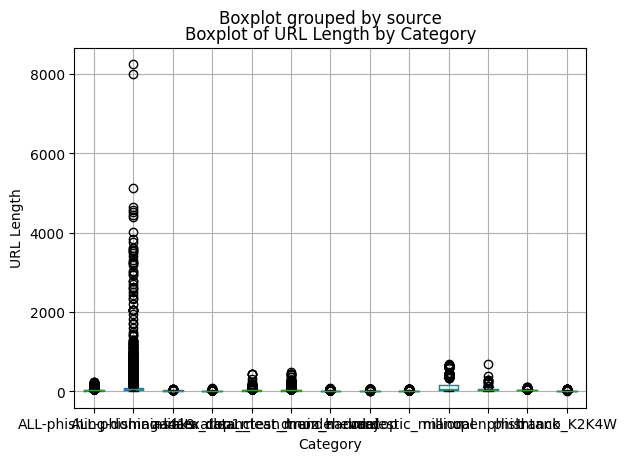

In [ ]:
import matplotlib.pyplot as plt
#boxplot to compare the distribution of URL lengths between different categories (e.g., malicious vs. non-malicious).
plt.figure(figsize=(10, 6))
md.select('source', 'url_len').toPandas().boxplot(column='url_len', by='source')
plt.xlabel('Category')
plt.ylabel('URL Length')
plt.title('Boxplot of URL Length by Category')
plt.show()

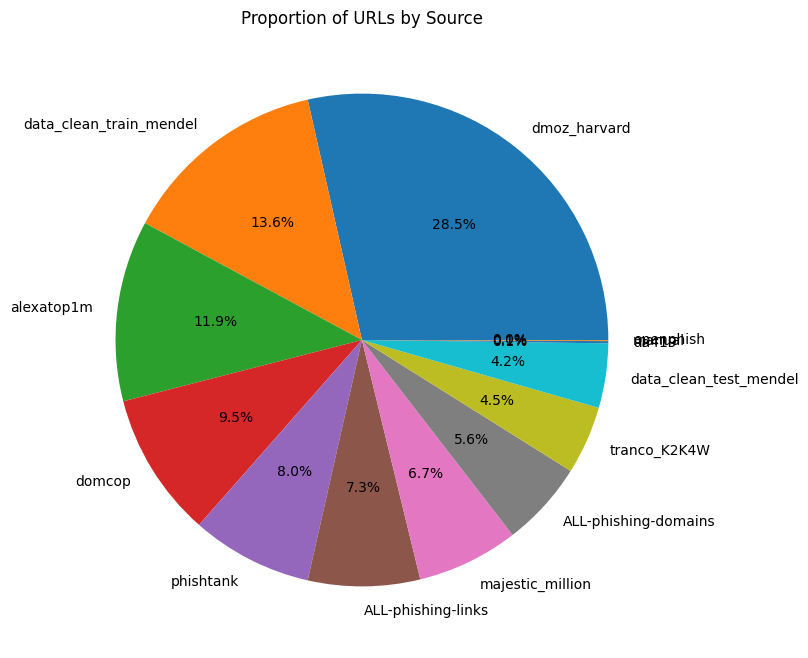

In [ ]:
#pie chart to visualize the proportion of URLs from different sources in the dataset.
sources_count = md.groupBy('source').count().orderBy('count', ascending=False).toPandas()

plt.figure(figsize=(8, 8))
plt.pie(sources_count['count'], labels=sources_count['source'], autopct='%1.1f%%')
plt.title('Proportion of URLs by Source')
plt.show()

In [ ]:
#unique values for source
data.select("source").distinct().show()

+--------------------+
|              source|
+--------------------+
|data_clean_test_m...|
|           openphish|
|        dmoz_harvard|
|           phishtank|
|              manual|
|              domcop|
|  ALL-phishing-links|
|          alexatop1m|
|               aa419|
|    majestic_million|
|data_clean_train_...|
|        tranco_K2K4W|
|ALL-phishing-domains|
+--------------------+



In [ ]:
#Converting the string into numerical
sourceEncode = StringIndexer(inputCol = "source",outputCol ="source_index").fit(data)
data = sourceEncode.transform(data)

In [ ]:
#after encoding
data.select("source_index").distinct().show()

+------------+
|source_index|
+------------+
|         8.0|
|         0.0|
|         7.0|
|         1.0|
|         4.0|
|        11.0|
|         3.0|
|         2.0|
|        10.0|
|         6.0|
|         5.0|
|         9.0|
|        12.0|
+------------+



**FEATURE SELECTION**

In [ ]:
df = data.select('source','source_index','url_has_login','url_has_client','url_has_server','url_len','label')

df.show()

+--------------------+------------+-------------+--------------+--------------+-------+-----+
|              source|source_index|url_has_login|url_has_client|url_has_server|url_len|label|
+--------------------+------------+-------------+--------------+--------------+-------+-----+
|        dmoz_harvard|         0.0|            0|             0|             0|     15|    0|
|    majestic_million|         6.0|            0|             0|             0|     12|    0|
|          alexatop1m|         2.0|            0|             0|             0|     12|    0|
|data_clean_train_...|         1.0|            0|             0|             0|     15|    0|
|ALL-phishing-domains|         7.0|            0|             0|             0|     29|    1|
|              domcop|         3.0|            0|             0|             0|     21|    0|
|        dmoz_harvard|         0.0|            0|             0|             0|     33|    0|
|              domcop|         3.0|            0|           

In [ ]:
#VectorAssembler
req_features =  ['source_index','url_has_login','url_has_client','url_has_server','url_len']

vec_assemb = VectorAssembler(inputCols=req_features,outputCol ="features")

In [ ]:
vec_df = vec_assemb.transform(df)
vec_df.show()


+--------------------+------------+-------------+--------------+--------------+-------+-----+--------------------+
|              source|source_index|url_has_login|url_has_client|url_has_server|url_len|label|            features|
+--------------------+------------+-------------+--------------+--------------+-------+-----+--------------------+
|        dmoz_harvard|         0.0|            0|             0|             0|     15|    0|      (5,[4],[15.0])|
|    majestic_million|         6.0|            0|             0|             0|     12|    0|(5,[0,4],[6.0,12.0])|
|          alexatop1m|         2.0|            0|             0|             0|     12|    0|(5,[0,4],[2.0,12.0])|
|data_clean_train_...|         1.0|            0|             0|             0|     15|    0|(5,[0,4],[1.0,15.0])|
|ALL-phishing-domains|         7.0|            0|             0|             0|     29|    1|(5,[0,4],[7.0,29.0])|
|              domcop|         3.0|            0|             0|             0| 

**MODEL BUILDING**

In [ ]:
#Train test split
train_df,test_df = vec_df.randomSplit([0.7,0.3])

In [ ]:
train_df.count()

1177011

In [ ]:
test_df.count()

505202

In [ ]:
train_df.describe()

summary,source,source_index,url_has_login,url_has_client,url_has_server,url_len,label
count,1177011,1177011,1177011,1177011,1177011,1177011,1177011
mean,NULL,2.9006517356252406,0.01566255540517463,0.001932862139776094,0.002285450178460524,23.78241749652297,0.2150702075001848
stddev,NULL,2.803622824233719,0.12416623076345035,0.04392183765202071,0.04775174167762791,34.441351140745354,0.4108712167735917
min,ALL-phishing-domains,0.0,0,0,0,2,0
max,tranco_K2K4W,12.0,1,1,1,8250,1


**PCA**

In [ ]:
from pyspark.ml.feature import PCA


numericColsAll  = ['url_has_login','url_has_client','url_has_server','url_len']
label = 'label'
assembler = VectorAssembler(inputCols=numericColsAll , outputCol="Numfeatures")
df = assembler.transform(md)

    # Apply PCA
pca = PCA(k=2, inputCol="Numfeatures", outputCol="pca_features")
model = pca.fit(df)
result = model.transform(df)
result.select("Numfeatures", "pca_features").show(truncate=False)


+---------------+------------------------------------------+
|Numfeatures    |pca_features                              |
+---------------+------------------------------------------+
|(4,[3],[15.0]) |[-14.999992762772711,0.014593764420373079]|
|(4,[3],[12.0]) |[-11.99999421021817,0.011675011536298463] |
|(4,[3],[12.0]) |[-11.99999421021817,0.011675011536298463] |
|(4,[3],[15.0]) |[-14.999992762772711,0.014593764420373079]|
|(4,[3],[29.0]) |[-28.999986008027243,0.028214611212721286]|
|(4,[3],[21.0]) |[-20.999989867881794,0.02043127018852231] |
|(4,[3],[33.0]) |[-32.99998407809996,0.03210628172482077]  |
|(4,[3],[25.0]) |[-24.99998793795452,0.024322940700621798] |
|(4,[3],[33.0]) |[-32.99998407809996,0.03210628172482077]  |
|(4,[3],[21.0]) |[-20.999989867881794,0.02043127018852231] |
|(4,[3],[35.0]) |[-34.999983113136324,0.03405211698087052] |
|(4,[3],[13.0]) |[-12.99999372773635,0.012647929164323335] |
|(4,[3],[118.0])|[-117.99994306714532,0.11480428010693489] |
|(4,[3],[20.0]) |[-19.99

**LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression(featuresCol ="features",labelCol="label")

lr_model = lr.fit(train_df)

y_pred1 = lr_model.transform(test_df)

y_pred1.show()

+--------------------+------------+-------------+--------------+--------------+-------+-----+-------------------+--------------------+--------------------+----------+
|              source|source_index|url_has_login|url_has_client|url_has_server|url_len|label|           features|       rawPrediction|         probability|prediction|
+--------------------+------------+-------------+--------------+--------------+-------+-----+-------------------+--------------------+--------------------+----------+
|ALL-phishing-domains|         7.0|            0|             0|             0|      5|    1|(5,[0,4],[7.0,5.0])|[1.72823993077039...|[0.84918714962728...|       0.0|
|ALL-phishing-domains|         7.0|            0|             0|             0|      5|    1|(5,[0,4],[7.0,5.0])|[1.72823993077039...|[0.84918714962728...|       0.0|
|ALL-phishing-domains|         7.0|            0|             0|             0|      6|    1|(5,[0,4],[7.0,6.0])|[1.64632299637371...|[0.83839347341010...|       0.0

In [ ]:
y_pred1.select('label','rawPrediction', 'probability', 'prediction').show()

+-----+--------------------+--------------------+----------+
|label|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+----------+
|    1|[1.72823993077045...|[0.84918714962729...|       0.0|
|    1|[1.72823993077045...|[0.84918714962729...|       0.0|
|    1|[1.64632299637376...|[0.83839347341011...|       0.0|
|    1|[1.64632299637376...|[0.83839347341011...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708...|[0.82698468535175...|       0.0|
|    1|[1.56440606197708

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
mult_eval =MulticlassClassificationEvaluator(labelCol="label",metricName="accuracy")


accuracy = mult_eval.evaluate(y_pred1)
print("Accuracy : " ,accuracy)

Accuracy :  0.8366811691165118


**DECISIONTREE CLASSIFIER**

In [ ]:
#Decision tree
dc = DecisionTreeClassifier(featuresCol ="features",labelCol="label")
dc_model = dc.fit(train_df)
y_pred = dc_model.transform(test_df)

y_pred.show()

+--------------------+------------+-------------+--------------+--------------+-------+-----+-------------------+--------------+-----------+----------+
|              source|source_index|url_has_login|url_has_client|url_has_server|url_len|label|           features| rawPrediction|probability|prediction|
+--------------------+------------+-------------+--------------+--------------+-------+-----+-------------------+--------------+-----------+----------+
|ALL-phishing-domains|         7.0|            0|             0|             0|      5|    1|(5,[0,4],[7.0,5.0])|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|ALL-phishing-domains|         7.0|            0|             0|             0|      5|    1|(5,[0,4],[7.0,5.0])|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|ALL-phishing-domains|         7.0|            0|             0|             0|      6|    1|(5,[0,4],[7.0,6.0])|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|ALL-phishing-domains|         7.0|            0|             0|             0|      6| 

In [ ]:
y_pred.select('label','rawPrediction', 'probability', 'prediction').show()

+-----+--------------+-----------+----------+
|label| rawPrediction|probability|prediction|
+-----+--------------+-----------+----------+
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|       1.0|
|    1|[0.0,246401.0]|  [0.0,1.0]|

In [ ]:
mult_eval =MulticlassClassificationEvaluator(labelCol="label",metricName="accuracy")

dt_accuracy = mult_eval.evaluate(y_pred)

print("Decision Tree Accuracy : ",dt_accuracy)

Decision Tree Accuracy :  0.9958293910158709


In [ ]:
from tabulate import tabulate

# Sample accuracy scores for 4 models
model_names = ['Logistic regression', 'Decision Tree']
accuracy_scores = [0.83, 0.99]

# Create a list of tuples for the data and sort in descending order based on accuracy scores
data = sorted(list(zip(model_names, accuracy_scores)), key=lambda x: x[1], reverse=True)

# Create the table using tabulate
table = tabulate(data, headers=['Model', 'Accuracy Score'], tablefmt='fancy_grid')

# Print the table
print(table)

╒═════════════════════╤══════════════════╕
│ Model               │   Accuracy Score │
╞═════════════════════╪══════════════════╡
│ Decision Tree       │             0.99 │
├─────────────────────┼──────────────────┤
│ Logistic regression │             0.83 │
╘═════════════════════╧══════════════════╛


INFERENCE : The DecisionTree model (99% accuracy) outperforms the logistic model (83% accuracy)in terms of accuracy, indicating that it may be a better choice for predicting the malicious url that identifies the potentially harmful URLs to users.